# Homework 6: Advection and Diffusion

#### Objective:
In this homework, we will investigate the comparative magnitudes of advection and diffusion of heat in the ocean. For this exercise, we will use the `global_ocean_ebm` model from the last homework. 

#### Import Modules:
Begin by importing the modules to read in data, conduct calculations, and make plots.

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

## Part 1: Modify and Rerun the Model

To obtain the fields necessary for this homework, modify the `global_ocean_ebm` model to output the following diagnostics:

|Field Name|Output File|Frequency|Description|
|---------|--------|---------|-------|
ADVx_TH | diags/ADVx_TH/ADVx_TH | -2592000 | Heat advection in the east-west direction |
|ADVy_TH | diags/ADVy_TH/ADVy_TH | -2592000 | Heat advection in the north-south direction |
|DFxE_TH | diags/DFxE_TH/DFxE_TH | -2592000 | Heat diffusion in the east-west direction |
|DFyE_TH | diags/DFyE_TH/DFyE_TH | -2592000 | Heat diffusion in the north-south direction |

Run your model on Spartan with these diagnostics for a year after a reasonable model spin up.

Then, download your output from Spartan into a "run" directory on your local machine or hard drive. Define the path to your run directory here.

In [2]:
run_folder = '/Users/masonjones/Desktop/MS274/HW6/diags'

## Part 2: The Heat Equation
In the space below, write down the equation that describes the evolution of temperature in the ocean. Then, for each term in the equation, write one sentence to describe what the term means qualitatively.

$$
\frac{\partial \Theta}{\partial t}
= -\,\vec{u}\cdot\nabla \Theta
+\kappa\,\frac{\partial^{2}\Theta}{\partial t^{2}}
+\frac{J_H}{C_p\,\rho_w}
$$


This equation cosists of 3 parts, Diffusion, advection and other smaller variables like solar radiation and iceberg melt.

## Part 3: Considering Temperature
In class, we wrote the temperature equation with the symbol $\Theta$. What does this term signify and why do we use it instead of temperature $T$?

This symbol is used to denote the variable potential temperature, a variable that standardizes temperature respect to the depth/pressure that that parcel of water is at when its brought to the surface. 

## Part 4: Read in the data
As shown above, the `ADVx_TH`, `ADVy_TH`, `DFxE_TH` and `DFyE_TH` variables refer to the $x$- and $y$-components of advection and diffusion (vector quantities). The $x$-component is aligned roughly eastward and the $y$-component is aligned roughly northward near the equator. Read in the 4 advection and diffusion fields. The units of these fields are  $^{\circ}$C$\cdot$m$^3$/s - a transport of temperature with volume. The quantity can by converted to a heat flux (in units of $W$) by considering specific heat ($C_p$) and the density $\rho_w$ of seawater. It is not necessary to make this conversion in this homework.

In addition to the 4 fields above, also read in the fields `XC` and `YC` grids generated by the model in your run directory:

In [3]:
n_rows = 40  
n_cols = 90
n_depth_levels = 15

# read in your output data here:

ADVx_TH_file = os.path.join(run_folder, 'ADVx_TH', 'ADVx_TH.0000000030.data')
ADVx_TH = np.fromfile(ADVx_TH_file, '>f4').reshape((15,40,90))

ADVy_TH_file =  os.path.join(run_folder, 'ADVy_TH', 'ADVy_TH.0000000030.data')
ADVy_TH = np.fromfile(ADVy_TH_file, '>f4').reshape((15,40,90))

DFxE_TH_file = os.path.join(run_folder, 'DFxE_TH', 'DFxE_TH.0000000030.data')
DFxE_TH = np.fromfile(DFxE_TH_file, '>f4').reshape((15,40,90))

DFyE_TH_file = os.path.join(run_folder, 'DFyE_TH', 'DFyE_TH.0000000030.data')
DFyE_TH = np.fromfile(DFyE_TH_file, '>f4').reshape((15,40,90))


XC_file = os.path.join(run_folder,'XC.data')
XC = np.fromfile(XC_file, '>f4').reshape((n_rows, n_cols))

YC_file = os.path.join(run_folder,'YC.data')
YC = np.fromfile(YC_file, '>f4').reshape((n_rows, n_cols))

If necessary, subset the variables to the first depth level ($k=0$). This is necessary if your data.diagnostics file did not specify to output at the surface level only

In [4]:
ADVx_sfc = ADVx_TH[0, :, :]   
ADVy_sfc = ADVy_TH[0, :, :]
DFxE_sfc = DFxE_TH[0, :, :]
DFyE_sfc = DFyE_TH[0, :, :]


## Part 5: Plot of advection and diffusion
Next, plot the vector components of advection and diffusion in a 2x2 grid of plots. In creating your plot, be sure to do the following:
- Use the `vmin` and `vmax` values in the `pcolormesh` plotting command to control the minimum and maximum values of the plot. Each pair of plots ($x$- and $y$- components for advection, $x$- and $y$- components for diffusion) should use the same bounds. You color bounds should fit the data appropriately and the min and max values should match (-1*min = max). You may find the functions `np.min()` and `np.max()` helpful.
- Add a colorbar and use a divergent colormap, such as 'seismic' or something similar.
- Add labels to your axes and a title on each subplot

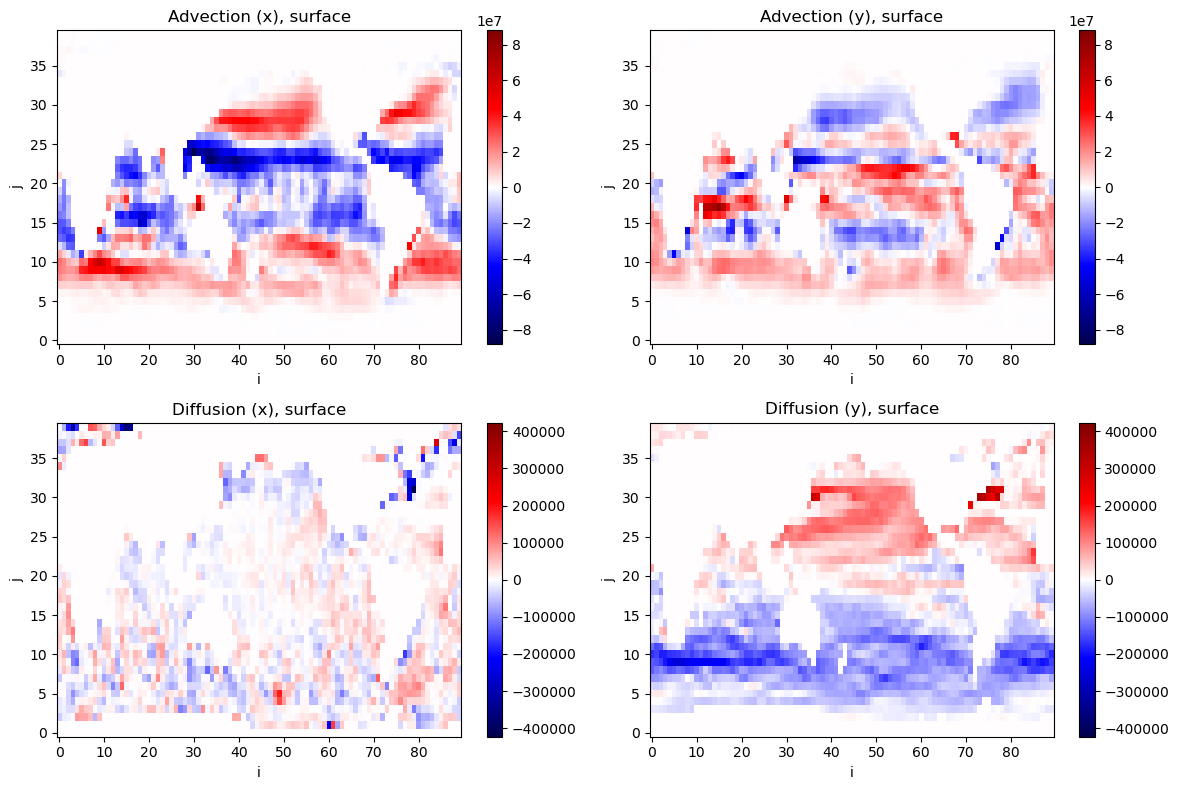

In [5]:
adv_lim  = max(np.abs(ADVx_sfc).max(), np.abs(ADVy_sfc).max())
dif_lim  = max(np.abs(DFxE_sfc).max(), np.abs(DFyE_sfc).max())

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Advection (x)
im = axs[0, 0].pcolormesh(ADVx_sfc, cmap='seismic', vmin=-adv_lim, vmax=adv_lim, shading='nearest')
axs[0, 0].set_title('Advection (x), surface')
axs[0, 0].set_xlabel('i')
axs[0, 0].set_ylabel('j')
fig.colorbar(im, ax=axs[0, 0])

# Advection (y)
im = axs[0, 1].pcolormesh(ADVy_sfc, cmap='seismic', vmin=-adv_lim, vmax=adv_lim, shading='nearest')
axs[0, 1].set_title('Advection (y), surface')
axs[0, 1].set_xlabel('i')
axs[0, 1].set_ylabel('j')
fig.colorbar(im, ax=axs[0, 1])

# Diffusion (x)
im = axs[1, 0].pcolormesh(DFxE_sfc, cmap='seismic', vmin=-dif_lim, vmax=dif_lim, shading='nearest')
axs[1, 0].set_title('Diffusion (x), surface')
axs[1, 0].set_xlabel('i')
axs[1, 0].set_ylabel('j')
fig.colorbar(im, ax=axs[1, 0])

# Diffusion (y)
im = axs[1, 1].pcolormesh(DFyE_sfc, cmap='seismic', vmin=-dif_lim, vmax=dif_lim, shading='nearest')
axs[1, 1].set_title('Diffusion (y), surface')
axs[1, 1].set_xlabel('i')
axs[1, 1].set_ylabel('j')
fig.colorbar(im, ax=axs[1, 1])

plt.tight_layout()
plt.show()



## Part 6: Plot Magnitudes
To compare the differences advection and diffusion, we first need to compute the magnitude. The magnitude of a vector quantity is given by

$$
|\textbf{v}| = \sqrt{v_x^2 + v_y^2}
$$

Apply this formula to the fields above to produce fields of 2D advection and diffusion at the surface of the ocean.

In [6]:
adv_mag_sfc = np.hypot(ADVx_sfc, ADVy_sfc)   # (40, 90)
dif_mag_sfc = np.hypot(DFxE_sfc, DFyE_sfc)   # (40, 90)

print("Advection magnitude (surface):", adv_mag_sfc.shape, 
      "min/max:", np.nanmin(adv_mag_sfc), np.nanmax(adv_mag_sfc))
print("Diffusion magnitude (surface):", dif_mag_sfc.shape, 
      "min/max:", np.nanmin(dif_mag_sfc), np.nanmax(dif_mag_sfc))


Advection magnitude (surface): (40, 90) min/max: 0.0 9.990173e+07
Diffusion magnitude (surface): (40, 90) min/max: 0.0 423046.34


Now, plot the magnitudes of advection and diffusion. Since we are now working with magnitude rather than directional values, you should use a sequential colormap rather than a divergent colormap.

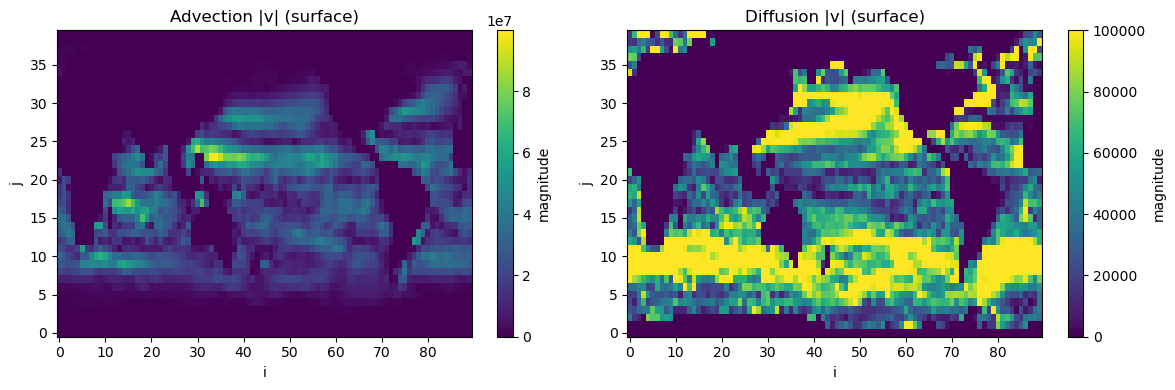

In [7]:
vmax = np.nanmax([adv_mag_sfc.max(), dif_mag_sfc.max()])
vmin = 0.0  

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Advection magnitude
im0 = axs[0].pcolormesh(adv_mag_sfc, cmap='viridis', vmin=vmin, vmax=vmax, shading='nearest')
axs[0].set_title('Advection |v| (surface)')
axs[0].set_xlabel('i'); axs[0].set_ylabel('j')
cbar0 = fig.colorbar(im0, ax=axs[0])
cbar0.set_label('magnitude')

# Diffusion magnitude
im1 = axs[1].pcolormesh(dif_mag_sfc, cmap='viridis', vmin=vmin, vmax=100000, shading='nearest')
axs[1].set_title('Diffusion |v| (surface)')
axs[1].set_xlabel('i'); axs[1].set_ylabel('j')
cbar1 = fig.colorbar(im1, ax=axs[1])
cbar1.set_label('magnitude')

plt.tight_layout()
plt.show()


What is the mean ratio between advection and diffusion of temperature? Do a quick calculation below to compute the ratio. Be sure not to include points on land where the magnitude of each is 0.

In [8]:

# Ocean-only mask
mask = (adv_mag_sfc > 0) & (dif_mag_sfc > 0) & np.isfinite(adv_mag_sfc) & np.isfinite(dif_mag_sfc)

# Per-cell ratio and its mean
ratio = adv_mag_sfc[mask] / dif_mag_sfc[mask]
mean_ratio = ratio.mean()

print(f"Mean ratio |Advection|/|Diffusion| at surface (ocean-only): {mean_ratio:.4g}")



Mean ratio |Advection|/|Diffusion| at surface (ocean-only): 852.5


## Part 7: Advection vs Diffusion
In the calculation above, we see that one process is responsible for transporting much more heat than the other. Which process is larger?

Suppose you would like to simplify the ocean model to be less computationally expensive. One way that you could achieve this is by removing processes from the model which have less of an effect on the model behavior than others. Based on the above plots and calculations, which process would you remove? Specifically, in the equation written in part 1, which term would you cancel from the equation?

Advection is the primary process responsible for heat transfer. If i were to remove variables to make it more simple I'd remove the Diffusion variables. Within the equation id remove the last 2 variables for diffusion and solar radiation because the magnitude isnt nearly as high as advection. 